In [58]:
import os
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
#import seaborn as sns
from random import randrange, uniform
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
#import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from  matplotlib import pyplot 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict,train_test_split

In [59]:
os.chdir("D:\SnehaDS")

In [60]:
data = pd.read_csv("day.csv")

In [61]:
data.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [62]:
data.shape

(731, 16)

In [63]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [64]:
type(data)

pandas.core.frame.DataFrame

In [65]:
data.shape

(731, 16)

In [66]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [67]:
data.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)

In [68]:
data.columns

Index(['rec_id', 'datetime', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weather_condition', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [69]:
data['datetime']=pd.to_datetime(data.datetime)

data['season']=data.season.astype('category')
data['year']=data.year.astype('category')
data['month']=data.month.astype('category')
data['holiday']=data.holiday.astype('category')
data['weekday']=data.weekday.astype('category')
data['workingday']=data.workingday.astype('category')
data['weather_condition']=data.weather_condition.astype('category')

In [70]:
data.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [71]:
data.dtypes

rec_id                        int64
datetime             datetime64[ns]
season                     category
year                       category
month                      category
holiday                    category
weekday                    category
workingday                 category
weather_condition          category
temp                        float64
atemp                       float64
humidity                    float64
windspeed                   float64
casual                        int64
registered                    int64
total_count                   int64
dtype: object

In [72]:
data.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [73]:
data.isnull().sum()

rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

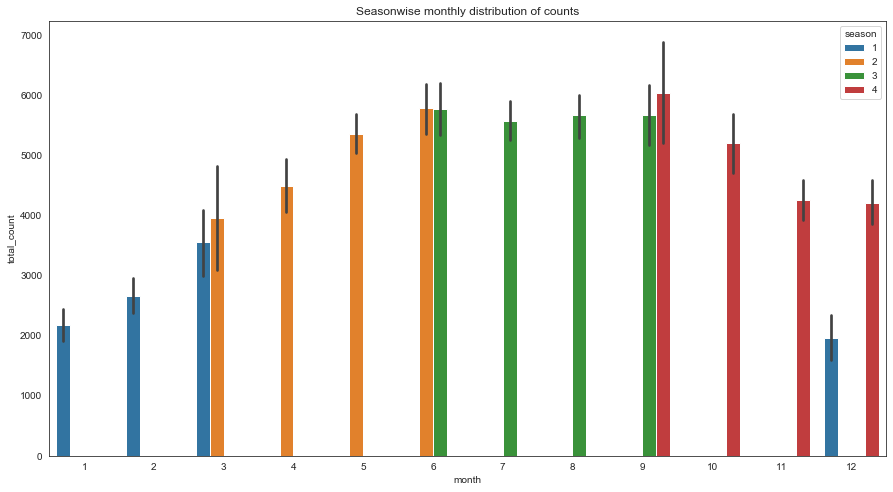

Text(0.5, 1.0, 'Weekday wise monthly distribution of counts')

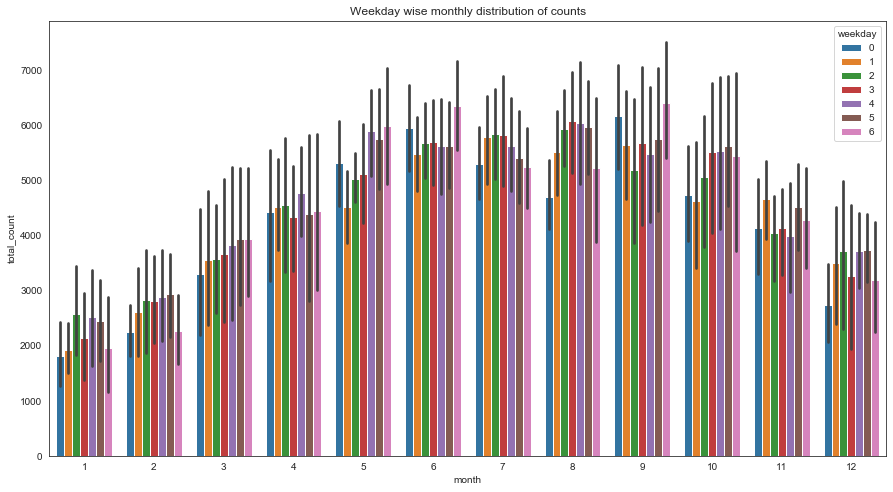

In [74]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=data[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')
plt.show()
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=data[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')

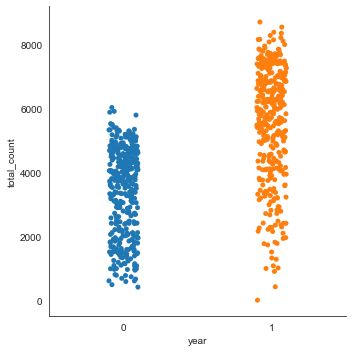

In [75]:

sns.catplot(x='year',y='total_count',data=data[['year','total_count']])
plt.show()

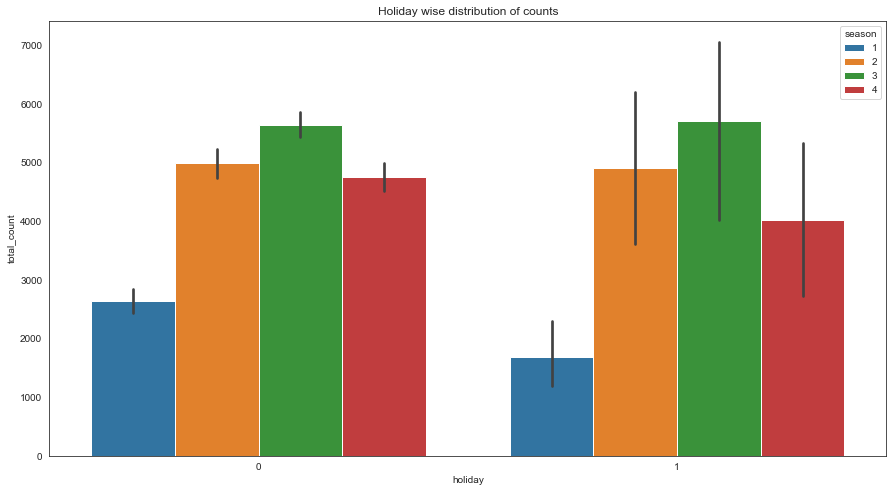

In [19]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=data,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')
plt.show()

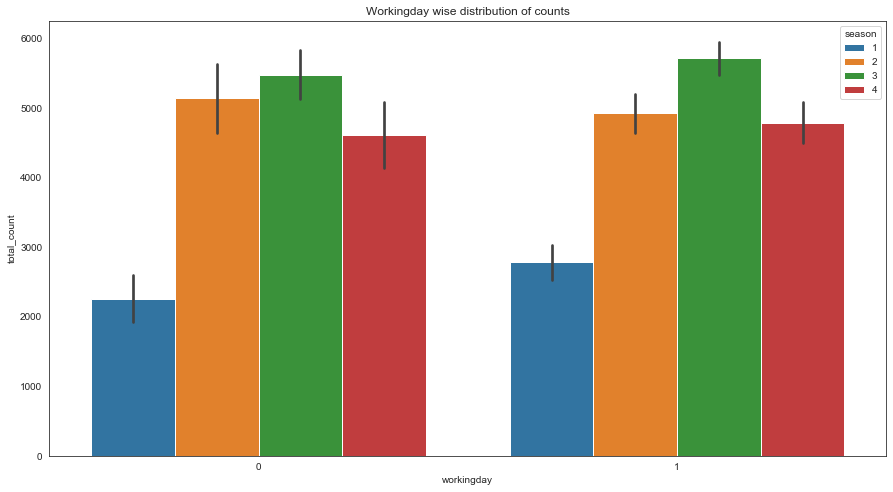

In [77]:
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=data,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday wise distribution of counts')
plt.show()

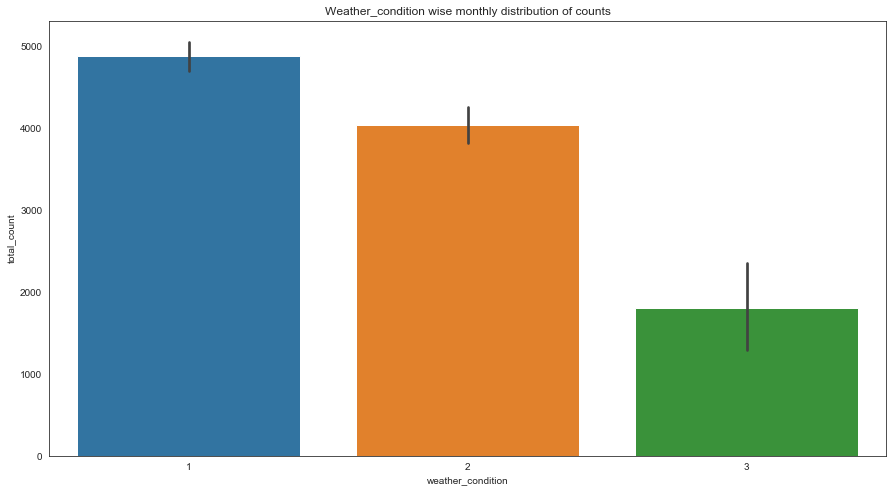

In [78]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='total_count',data=data[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather_condition wise monthly distribution of counts')
plt.show()

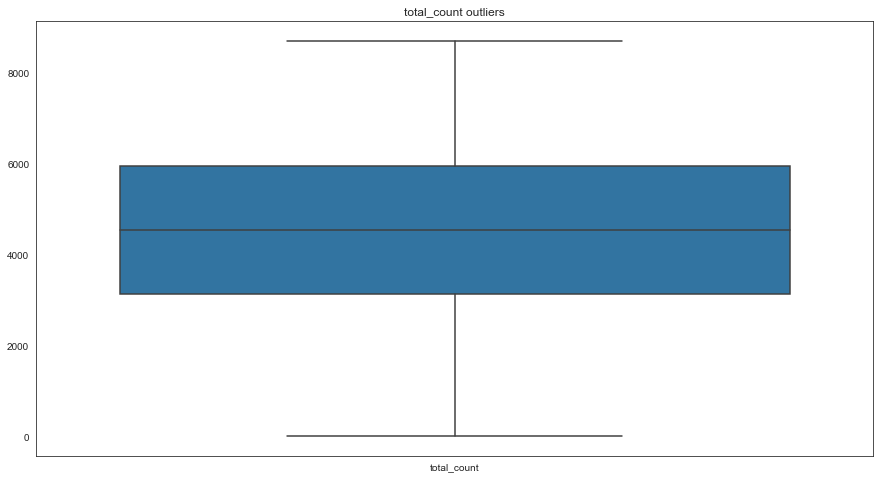

In [79]:
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=data[['total_count']])
ax.set_title('total_count outliers')
plt.show()

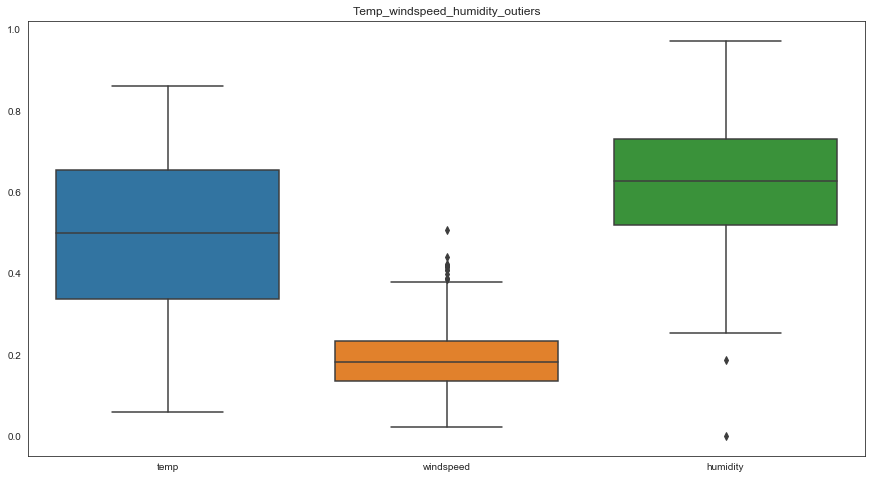

In [80]:
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=data[['temp','windspeed','humidity']])
ax.set_title('Temp,windspeed and humidity outiers')
plt.show()

In [83]:
# # create a dataframe for outlier 
wind_humidity=pd.DataFrame(data,columns=['windspeed','humidity'])
 #Cnames for outliers                     
cnames=['windspeed','humidity']  
for i in cnames:
    print(i)
    q75, q25 = np.percentile(wind_humidity.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    print(min)
    print(max)
    wind_humidity.loc[wind_humidity.loc[:,i]<min,:i]=np.nan  #Replace with NA
    wind_humidity.loc[wind_humidity.loc[:,i]>max,:i]=np.nan  #Replace with NA

windspeed
-0.012446750000000034
0.38061125
humidity
0.20635349999999997
1.0455215


In [84]:
wind_humidity.head(10)

,windspeed,humidity
0,0.160446,0.805833
1,0.248539,0.696087
2,0.248309,0.437273
3,0.160296,0.590435
4,0.186900,0.436957
5,0.089565,0.518261
6,0.168726,0.498696
7,0.266804,0.535833
8,0.361950,0.434167
9,0.223267,0.482917


In [85]:
wind_humidity.isnull().sum()

windspeed    13
humidity      1
dtype: int64

In [86]:
wind_humidity.describe()

,windspeed,humidity
count,718.000000,730.000000
mean,0.186392,0.629601
std,0.071791,0.139814
min,0.022392,0.254167
25%,0.134331,0.522187
50%,0.178802,0.628333
75%,0.230724,0.731042
max,0.378108,0.972500


In [87]:
wind_humidity['windspeed']=wind_humidity['windspeed'].fillna(wind_humidity['windspeed'].mean())
wind_humidity['humidity']=wind_humidity['humidity'].fillna(wind_humidity['humidity'].mean())

In [88]:
wind_humidity.isnull().sum()

windspeed    0
humidity     0
dtype: int64

In [89]:
#Replacing the imputated windspeed
data['windspeed']=data['windspeed'].replace(wind_humidity['windspeed'])
#Replacing the imputated humidity
data['humidity']=df['humidity'].replace(wind_humidity['humidity'])
data.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


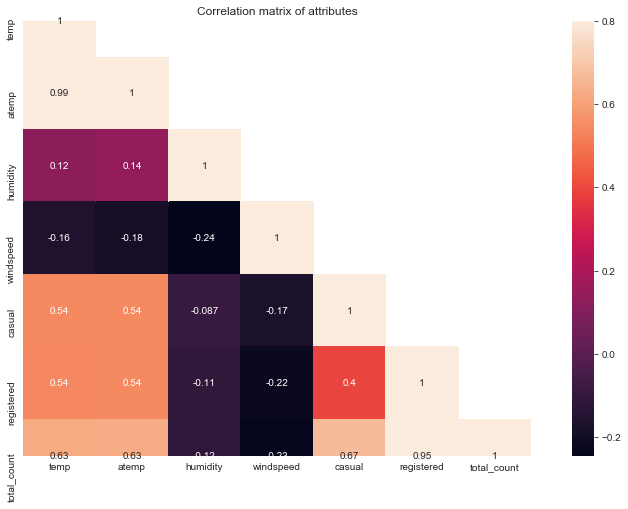

In [90]:
#we plot a correlation between numerical variable 
df_corr=data.loc[:,["temp","atemp","humidity","windspeed","casual","registered","total_count"]]
#Generate correlation matrix
corr = df_corr.corr()

mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
#Plot using seaborn library
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(corr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix')
plt.show()


# from correlation plot atemp and temp, casual and registered is having same information 

In [91]:
#Split the dataset into the train and test data

X_train,X_test,y_train,y_test=train_test_split(data.iloc[:,0:-3],df.iloc[:,-1],test_size=0.3, random_state=42)

#Reset train index values
X_train.reset_index(inplace=True)
y_train=y_train.reset_index()

# Reset test index values
X_test.reset_index(inplace=True)
y_test=y_test.reset_index()

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
print("X Train data: \n",X_train.head())
print("X Test data \n",X_test.head())
print("Y train data \n",y_train.head())
print("Y test data \n",y_test.head())

(511, 14) (220, 14) (511, 2) (220, 2)
X Train data: 
    index  rec_id   datetime season year month holiday weekday workingday  \
0    223     224 2011-08-12      3    0     8       0       5          1   
1    684     685 2012-11-15      4    1    11       0       4          1   
2    685     686 2012-11-16      4    1    11       0       5          1   
3    163     164 2011-06-13      2    0     6       0       1          1   
4    394     395 2012-01-30      1    1     1       0       1          1   

  weather_condition      temp     atemp  humidity  windspeed  
0                 1  0.708333  0.654042  0.415000   0.125621  
1                 2  0.321667  0.324492  0.620417   0.152987  
2                 1  0.345000  0.347204  0.524583   0.171025  
3                 1  0.635000  0.601654  0.494583   0.305350  
4                 1  0.269167  0.262625  0.400833   0.215792  
X Test data 
    index  rec_id   datetime season year month holiday weekday workingday  \
0    703     704 2012

In [92]:
#dataset for train attributes
train_attributes=X_train[['season','month','year','weekday','holiday','workingday','weather_condition','humidity','temp','windspeed']]
#dataset for test attributes
test_attributes=X_test[['season','month','year','weekday','holiday','workingday','humidity','temp','windspeed','weather_condition']]
#categorical attributes
cat_attributes=['season','holiday','workingday','weather_condition','year']
#numerical attributes
num_attributes=['temp','windspeed','humidity','month','weekday']

In [93]:
print(train_attributes.shape)
print(test_attributes.shape)

(511, 10)
(220, 10)


In [94]:
#To get dummy variables to encode the categorical features to numeric
train_encoded_attributes=pd.get_dummies(train_attributes,columns=cat_attributes)
test_encoded_attributes=pd.get_dummies(test_attributes,columns=cat_attributes)
print('Shape of train new dataframe::',train_encoded_attributes.shape)
print('Shape of test new dataframe::',test_encoded_attributes.shape)
train_encoded_attributes.head(5)
test_encoded_attributes.head(5)

Shape of train new dataframe:: (511, 18)
Shape of test new dataframe:: (220, 18)


,month,weekday,humidity,temp,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_condition_1,weather_condition_2,weather_condition_3,year_0,year_1
0,12,2,0.733750,0.475833,0.174129,0,0,0,1,1,0,0,1,1,0,0,0,1
1,2,4,0.437826,0.186957,0.277752,1,0,0,0,1,0,0,1,1,0,0,1,0
2,10,5,0.585833,0.330833,0.229479,0,0,0,1,1,0,0,1,0,1,0,1,0
3,4,0,0.676250,0.425833,0.172267,0,1,0,0,1,0,1,0,0,1,0,0,1
4,9,2,0.570000,0.550000,0.236321,0,0,0,1,1,0,0,1,1,0,0,0,1


In [95]:
#Training dataset for modelling
X_train=train_encoded_attributes
y_train=y_train.total_count.values
#Test dataset for prediction
X_test=test_encoded_attributes
y_test=y_test.total_count.values

In [96]:
print(y_train)

[4905 5445 5698 5020 3624 7572 6883 4075 4521 3727 5936 3126 4073 7509
 4334 7461 4308 3249  959 1685 4672 3243 5986 5315 6883 5531 2732 3922
 1162 5805 1098 1589 1472 2056 4844 5255 6778 4154 4648 6133 7132 4708
 7852 6073 3659 4187 1204 3423 4785 5464 2765 4127 7421 3523 5511 2935
 1321 1996  986 4780 4220 3786 3777 5810 3285 8362 3115 2914 3376 4322
 2416 6043 6544 3068 5312 2744 3214 4826  623 3194 4040 4839 3542 1536
 7767 4058 4608 7375 4570 1115  985 1787 2302 7415 5786 4765 3872 4694
 3577 2999 2918 4195 4717 4978 3333 5740 7058 7702 4630 6855 4046 4035
 2115 4539 5538 2729 6034 3429 1851  920 5382 3348 4579 5875 7363 7591
 5225 4068 8173 4509 6234 4098 4433 6299 7733 4665 3214 5102 4339 3623
 7693 3392 3750 5107 4274 4660 4378 3053 1927 4507 7605 4109 6536 1406
 4186 2660  506 6879 4744 1530 7446 4484 3894 5572 5202 5342 4714 7641
 3322 5217 4191 3228 4790 1317 6824 2402 6572 4792 5409  683 5847 3663
 4763 1749  441 4881 5170 3510 4773 1795 5515  627 1027 5905 5566 7639
 7965 

In [97]:
print(y_test)

[6606 1550 3747 6041 7538 7264 1605 2209 7499 5743 1796 3068 4891 5260
 2133 2471 2046 8156 5362 2298 7697 5463 5409 1872 1807 5130 2121 7436
 3830 5557 2743 3644 6196 7494 5918 3372 7582 6053 2566 1263 3944 3956
 7580 4906 6966  705 4458 5298 6043 4996 3351 2431 1011 4475 4725 4727
 2395 3351 4788 7175 6153 7442 1471 7865 6530 6211 7403 4302 2077 7333
 3117 1635 3811 4595 4363 2034 5686 4748 1416 4401 2114 2028 5668   22
 3940 4118 5423 1495 3620 3403 1501 7040 5992 4990 3095 2832 4713 2368
 3409 4991 7713 3785 6664 2496 2077 5267 1162 2739 6861 1360 4602 7282
 3570 8167 6230 4511 1461 3272 5923 2177 6398 1817 3239 1349 3867 5146
 4541 3368 2134 7410 3331 3974 5495 5319 5895 2227 4367 7460 1977 4266
 4864 1913 2132 4258 2792 5180 3958 4094 1842 3614 4274 7335 4123 4576
 1510 3520 4151 6779 2424 4677 6233 4105 4205 5323 1746 3204 6192 1969
 3613 4390 7006 7148 1985 3831 4569 5585 4916 5823 4189 1865 1107 7055
 7534 5499 7570 8555 7498 2236 5634 1650 7665 3005 4195 5026 2210 1685
 3606 

# Linear Regression

In [98]:
from sklearn import preprocessing,metrics,linear_model
lr_model=linear_model.LinearRegression()
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
#fit the trained model
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
#trainnning accuracy 
lr=lr_model.score(X_train,y_train)
print('Accuracy of the Trainning model  :',lr)
# R-squared scores
r2_scores = cross_val_score(lr_model, X_train, y_train, cv=3)
print('R-squared Trainning scores :',np.average(r2_scores))

Accuracy of the Trainning model  : 0.8165025087335218
R-squared Trainning scores : 0.7995611885231044


In [101]:
#predict the model
lr_pred=lr_model.predict(X_test)
lr_pred

array([6197.12329782, 1378.27938018, 3212.82326914, 4825.6058012 ,
       6672.2308762 , 6942.2039349 ,  693.99373527, 1929.80808599,
       6981.48110092, 6844.67173725, 2798.54559266, 2121.8457389 ,
       4465.68268321, 5486.74428544, 2189.59008463, 1827.67433934,
       2173.48158771, 7469.58027211, 5500.15015098, 2608.49336522,
       6933.20124884, 7837.10306473, 5532.48547104, 1261.13929139,
       1245.46616862, 4479.83361908, 2496.61989036, 6733.37234742,
       3854.86011528, 5802.97615092, 3103.90712661, 4252.34563973,
       6358.26561572, 6798.3144729 , 5790.26253638, 5402.54802544,
       6692.75313381, 5848.44121572, 3180.98457936,  805.80292438,
       4497.72178336, 3746.59014984, 6903.03554988, 4077.94155535,
       6907.0442079 , 1687.7942605 , 4801.49297945, 4723.9530173 ,
       6369.39948476, 4579.39869385, 3105.76669461, 2833.81705416,
       1829.36260472, 5601.65932265, 4625.78263028, 4089.39223053,
       4695.03945324, 3038.41700558, 4351.67190815, 6630.97204

In [102]:
import math
#Root mean square error 
rmse=math.sqrt(metrics.mean_squared_error(y_test,lr_pred))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,lr_pred)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)
lr=lr_model.score(X_test,y_test)
print('Accuracy of the Testing model  :',lr)

Root mean square error : 783.0616972625061
Mean absolute error : 594.7368430236426
Accuracy of the Testing model  : 0.8458932270657586


# LR 
testing accuracy : 84 %
    RMSE: 783
    MAE:594

# Decision Tree

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
dtr=DecisionTreeRegressor(min_samples_split=2,max_leaf_nodes=10).fit(X_train,y_train)

In [105]:
#Accuracy score of the model
dtr_score=dtr.score(X_train,y_train)
print('Accuracy of Trainning model :',dtr_score)

Accuracy of Trainning model : 0.8082151777539757


In [106]:
predictions_DT = dtr.predict(X_test)

In [107]:
#Root mean square error
rmse=math.sqrt(metrics.mean_squared_error(y_test,predictions_DT))
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,predictions_DT)
print('Root mean square error :',rmse)
print('Mean absolute error :',mae)

Root mean square error : 925.7976022448886
Mean absolute error : 667.8169018859927


In [108]:
def MAPE(y_test, predictions_DT): 
    mape = np.mean(np.abs((y_test - predictions_DT) / y_test))*100
    return mape

MAPE(y_test, predictions_DT)


132.77687359855219

# DT
Testing accuracy 
MAPE: 132
RMSE: 925
MAE: 667

# Rando Forest

In [109]:

#Training the model
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=200)
#Fit the trained model
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [110]:
#accuracy of the model
rf_score =rf.score(X_train,y_train)
print('Accuracy of the Training model :',rf_score)

Accuracy of the Training model : 0.9801688210679281


In [111]:
#predict the model
X_test=test_encoded_attributes
rf_pred=rf.predict(X_test)
rf_pred

array([6596.19 , 1498.995, 3462.61 , 5358.   , 7480.985, 7244.91 ,
       1471.165, 2180.635, 7317.785, 6430.205, 2071.03 , 2831.08 ,
       5023.88 , 5058.69 , 2097.2  , 2125.405, 2283.685, 7850.16 ,
       5085.33 , 2490.465, 7482.415, 6093.835, 5884.96 , 1740.955,
       1707.275, 4726.565, 1970.555, 7245.075, 3194.155, 5756.92 ,
       3018.045, 4048.92 , 6558.06 , 7339.02 , 6205.875, 5577.895,
       7252.53 , 6272.055, 3253.83 ,  960.4  , 3822.005, 3238.095,
       7253.795, 4519.255, 6927.925, 2288.725, 4327.905, 5615.72 ,
       6560.115, 4223.9  , 4254.41 , 3002.18 , 2245.65 , 4312.39 ,
       4625.845, 4197.795, 3569.72 , 3749.2  , 4296.93 , 6604.52 ,
       6177.66 , 6897.4  , 2036.6  , 7355.01 , 6465.785, 6366.355,
       5853.505, 4339.445, 1830.39 , 7311.355, 3854.925, 2045.84 ,
       3106.45 , 4000.125, 4268.37 , 3855.45 , 4773.38 , 4497.935,
       1335.26 , 4324.33 , 2488.285, 1992.82 , 5037.38 , 4268.34 ,
       3676.895, 3388.93 , 3910.16 , 3721.63 , 3506.245, 3371.

In [112]:
#Root mean square error
rmse = math.sqrt(metrics.mean_squared_error(y_test,rf_pred))
print('Root mean square error :',rmse)
#Mean absolute error
mae=metrics.mean_absolute_error(y_test,rf_pred)
print('Mean absolute error :',mae)

mape=MAPE(y_test, rf_pred)
print('MAPE :',mape)

Root mean square error : 644.975481060133
Mean absolute error : 423.7503863636363
MAPE : 100.87551298235822


# RF
Root mean square error : 647.4613862743968
Mean absolute error : 428.71768181818186
MAPE : 103.76256528297543

In [113]:
Bike_df1=pd.DataFrame(y_test,columns=['y_test'])
Bike_df2=pd.DataFrame(rf_pred,columns=['rf_pred'])
Bike_predictions=pd.merge(Bike_df1,Bike_df2,left_index=True,right_index=True)
Bike_predictions.to_csv('Bike_Renting_Python.csv')
Bike_predictions

,y_test,rf_pred
0,6606,6596.190
1,1550,1498.995
2,3747,3462.610
3,6041,5358.000
4,7538,7480.985
...,...,...
215,2659,3976.175
216,7338,7294.155
217,6978,6824.850
218,4795,3520.080


According to model analysis Random forest model give a high accuracy and low mean absoulte percentage error than Decision tree and linear regression.